In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
db_train = pd.read_csv('clasificacion1/train.csv')
db_test = pd.read_csv('clasificacion1/test.csv')
db_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
from sklearn.preprocessing import LabelEncoder
X = db_train.drop(columns=['satisfaction', 'Arrival Delay in Minutes'])
X_predict = db_test.drop(columns=['satisfaction', 'Arrival Delay in Minutes'])
y = db_train['satisfaction']
y_predict = db_test['satisfaction']
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X_predict['Gender'] = le.transform(X_predict['Gender'])
X['Customer Type'] = le.fit_transform(X['Customer Type'])
X_predict['Customer Type'] = le.transform(X_predict['Customer Type'])
X['Type of Travel'] = le.fit_transform(X['Type of Travel'])
X_predict['Type of Travel'] = le.transform(X_predict['Type of Travel'])
X['Class'] = le.fit_transform(X['Class'])
X_predict['Class'] = le.transform(X_predict['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=3, random_state=43) # La mejor depth es 17.
clf = clf.fit(X_train,y_train)

In [6]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict, knn.predict(X_predict))
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.62


In [16]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_predict, clf.predict(X_predict)))

Accuracy: 0.8485140129350169


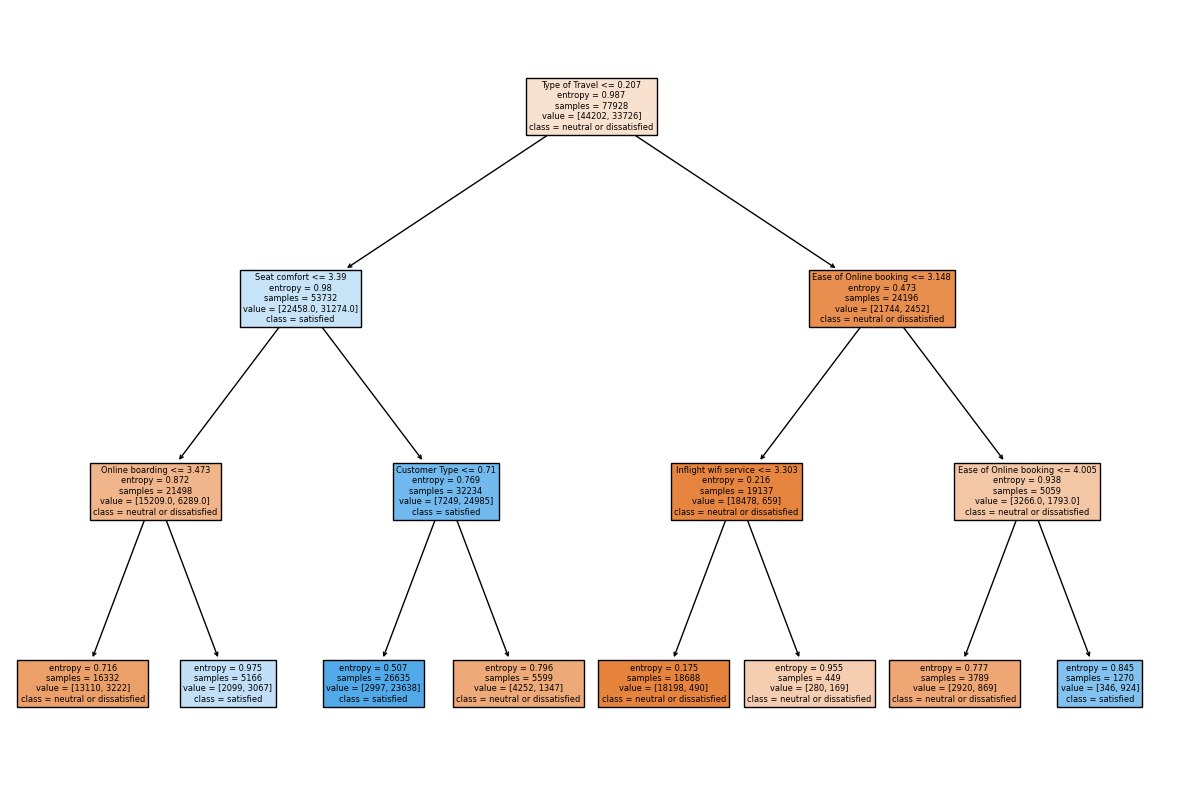

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["neutral or dissatisfied", "satisfied"])
plt.show()